## Settings

In [1]:
# Load basic packages
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt

# Custom functions using sec-edgar-api and yfinance
from finance.edgar_client import get_facts
from finance.fundamentals import annual_net_income, plot_annual_net_income, plot_net_income_growth
from finance.prices import historical_price

# Style settings
plt.style.use('ggplot')
plt.rc('axes', unicode_minus=False)
plt.rcParams.update({
    'axes.titlesize': 20,       # Plot titles
    'axes.labelsize': 16,       # X/Y axis labels
    'xtick.labelsize': 14,      # X-axis tick labels
    'ytick.labelsize': 16,      # Y-axis tick labels
    'legend.fontsize': 12,      # Legend (if used)
    'figure.titlesize': 22,     # Main figure title (if used)
})

## Company Information

In [8]:
ticker = 'ADBE'
facts = get_facts(ticker=ticker)

## Income

In [9]:
df_net_income = annual_net_income(facts)
df_net_income[0].tail(5)

,date,net_income,year
13,2020-11-27,5260000000,2020
14,2021-12-03,4822000000,2021
15,2022-12-02,4756000000,2022
16,2023-12-01,5428000000,2023
17,2024-11-29,5560000000,2024


## Income Growth (%)

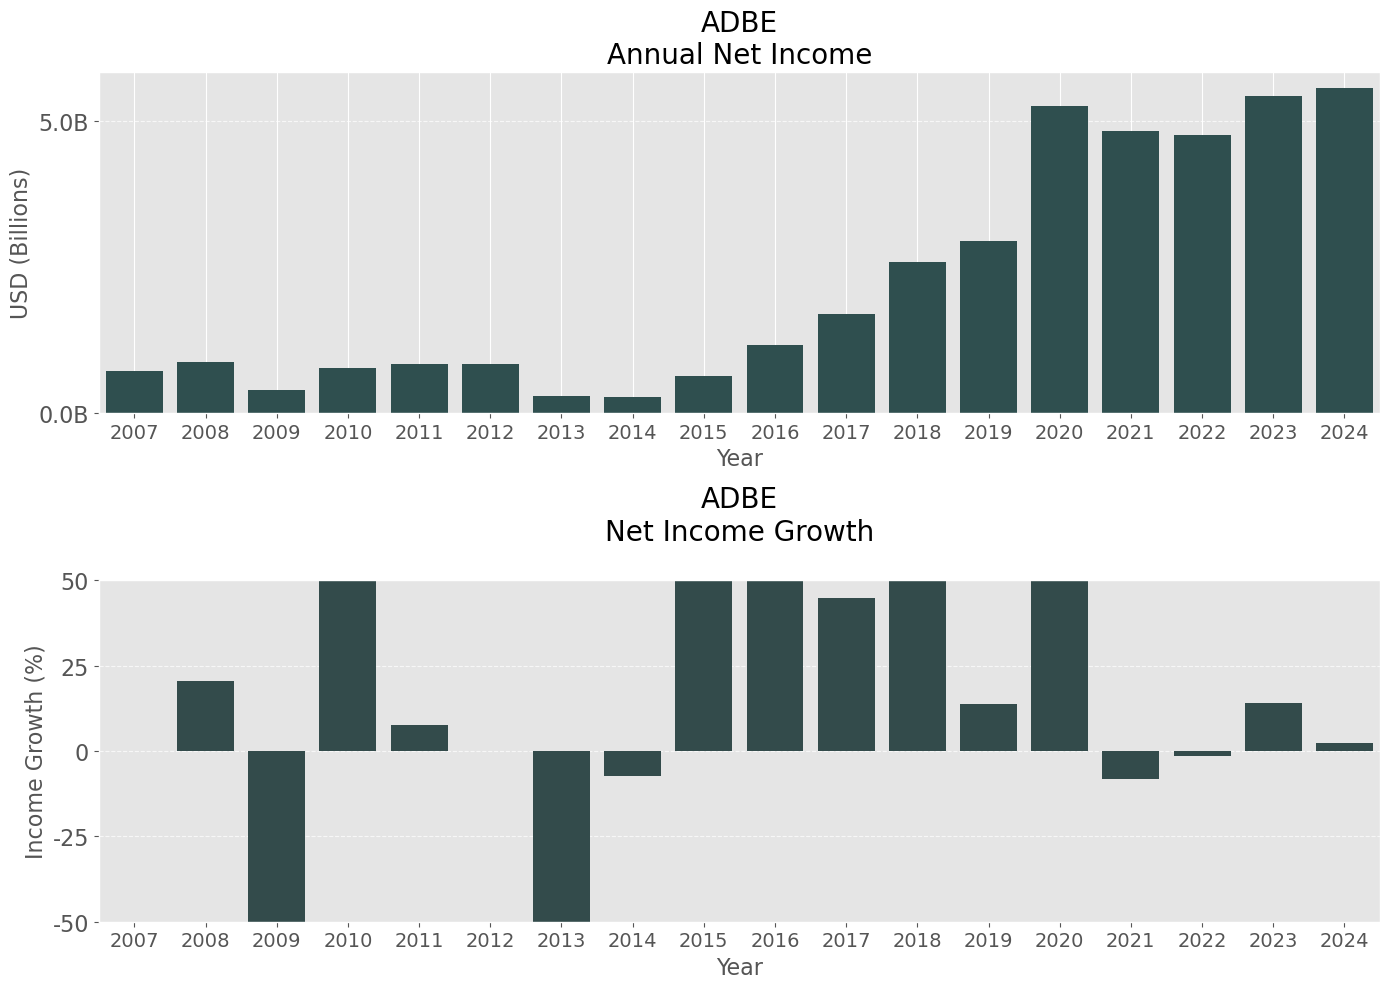

In [11]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

plot_annual_net_income(df_net_income[0], ticker=ticker, unit='B', ystep=50e8, ax=axes[0])
plot_net_income_growth(df_net_income[0], ticker=ticker, ymin=-50, ymax=50, ystep=25, ax=axes[1])

# ✅ Show x-ticks on upper graph too
axes[0].tick_params(labelbottom=True)

plt.tight_layout()
plt.show()

## Price

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


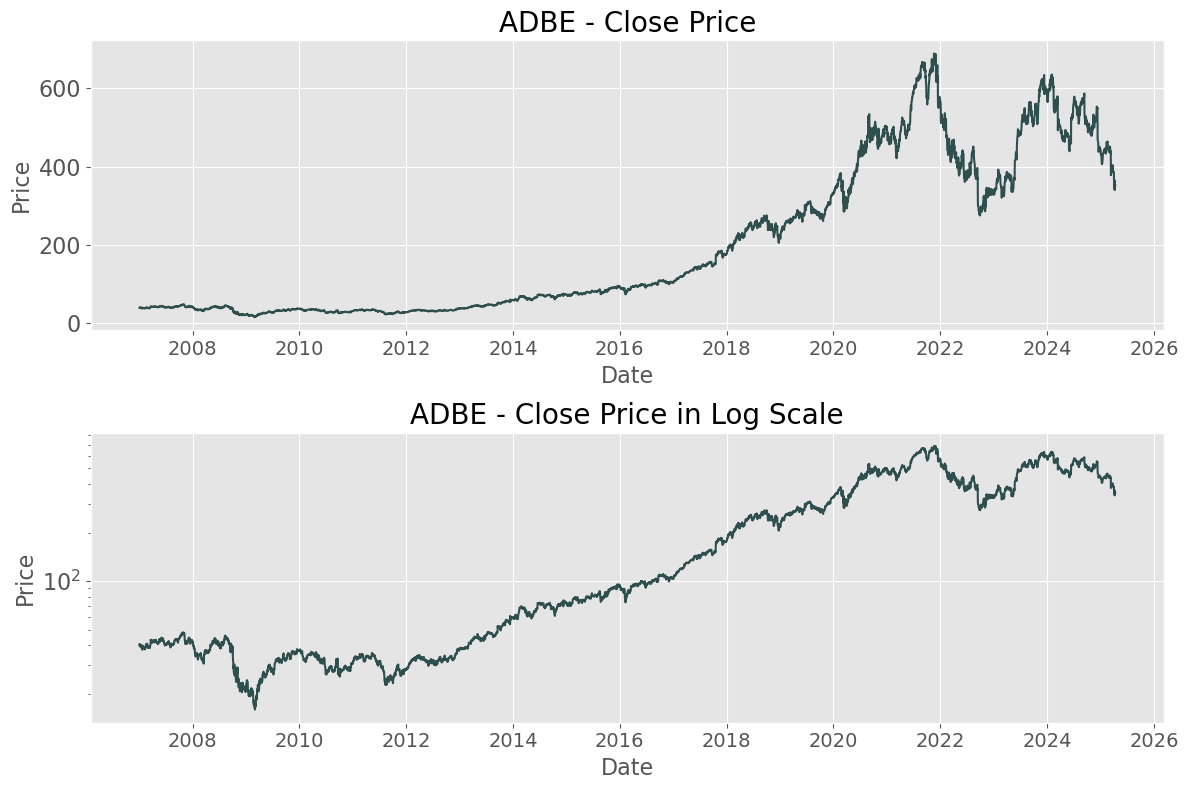

In [12]:
import matplotlib.pyplot as plt
from finance import historical_price

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

historical_price(ticker, start="2007", column="Close", scale='linear', ax=axes[0])
historical_price(ticker, start="2007", column="Close", scale='log', ax=axes[1])

axes[0].tick_params(labelbottom=True)  # Show x-ticks on upper plot too
plt.tight_layout()
plt.show()


## Dividends

In [13]:
from finance import annual_dividends

df_dividends = annual_dividends(facts)
df_dividends[0].tail(5)

""


In [ ]:
from finance import plot_annual_dividends, plot_dividends_growth

fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

plot_annual_dividends(df_dividends[0], ticker=ticker, unit='B', ax=axes[0])
plot_dividends_growth(df_dividends[0], ticker=ticker, ymin=-10, ymax=50, ystep=10, ax=axes[1])

axes[0].tick_params(labelbottom=True)
plt.tight_layout()
plt.show()